#  Self Study 3

In this self study we perform character recognition using SVM classifiers. We use the MNIST dataset, which consists of 70000 handwritten digits 0..9 at a resolution of 28x28 pixels. 

Stuff we need:

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import time
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.datasets import fetch_openml  ##couldn't run with the previous code


Now we get the MNIST data. Using the fetch_mldata function, this will be downloaded from the web, and stored in the directory you specify as data_home (replace my path in the following cell):

In [4]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml(name='mnist_784', data_home='/home/starksultana/Documentos/Mestrado_4o ano/2o sem AAU/ML/ML_selfstudy3')


The data has .data and .target attributes. The following gives us some basic information on the data:

In [5]:
print("Number of datapoints: {}\n".format(mnist.data.shape[0]))
print("Number of features: {}\n".format(mnist.data.shape[1]))
print("features: ", mnist.data[0].reshape(196,4))
print("List of labels: {}\n".format(np.unique(mnist.target)))

Number of datapoints: 70000

Number of features: 784

features:  [[  0.   0.   0.   0.]
 [  0.   0.   0.   0.]
 [  0.   0.   0.   0.]
 [  0.   0.   0.   0.]
 [  0.   0.   0.   0.]
 [  0.   0.   0.   0.]
 [  0.   0.   0.   0.]
 [  0.   0.   0.   0.]
 [  0.   0.   0.   0.]
 [  0.   0.   0.   0.]
 [  0.   0.   0.   0.]
 [  0.   0.   0.   0.]
 [  0.   0.   0.   0.]
 [  0.   0.   0.   0.]
 [  0.   0.   0.   0.]
 [  0.   0.   0.   0.]
 [  0.   0.   0.   0.]
 [  0.   0.   0.   0.]
 [  0.   0.   0.   0.]
 [  0.   0.   0.   0.]
 [  0.   0.   0.   0.]
 [  0.   0.   0.   0.]
 [  0.   0.   0.   0.]
 [  0.   0.   0.   0.]
 [  0.   0.   0.   0.]
 [  0.   0.   0.   0.]
 [  0.   0.   0.   0.]
 [  0.   0.   0.   0.]
 [  0.   0.   0.   0.]
 [  0.   0.   0.   0.]
 [  0.   0.   0.   0.]
 [  0.   0.   0.   0.]
 [  0.   0.   0.   0.]
 [  0.   0.   0.   0.]
 [  0.   0.   0.   0.]
 [  0.   0.   0.   0.]
 [  0.   0.   0.   0.]
 [  0.   0.   0.   0.]
 [  3.  18.  18.  18.]
 [126. 136. 175.  26.]
 [166. 255. 247

We can plot individual datapoints as follows:

Value of datapoint no. 9:
[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0. 189. 190.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0. 143. 247. 153.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0. 136. 247. 242.  86. 

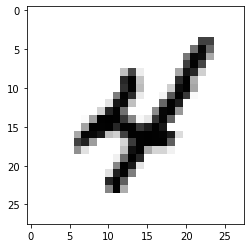

In [6]:
index = 9
print("Value of datapoint no. {}:\n{}\n".format(index,mnist.data[index]))
print("As image:\n")
plt.imshow(mnist.data[index].reshape(28,28),cmap=plt.cm.gray_r)
#plt.show()

To make things a little bit simpler (and faster!), we can extract from the data binary subsets, that only contain the data for two selected digits:

The first datapoint now is: 



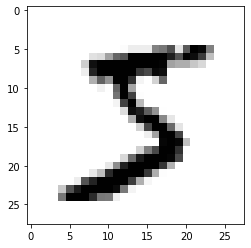

['5' '4' '4' ... '5' '4' '5']


In [7]:
digit0='4'
digit1='5'
mnist_bin_data=mnist.data[np.logical_or(mnist.target==digit0,mnist.target==digit1)]
mnist_bin_target=mnist.target[np.logical_or(mnist.target==digit0,mnist.target==digit1)]
print("The first datapoint now is: \n")
plt.imshow(mnist_bin_data[0].reshape(28,28),cmap=plt.cm.gray_r)
plt.show()
print(mnist_bin_target)

**Exercise 1 [SVM]:** Split the mnist_bin data into training and test set. Learn different SVM models by varying the kernel functions (SVM). For each configuration, determine the time it takes to learn the model, and the accuracy on the test data. 

You can get the current time using:

`import time` <br>
`now = time.time()`

*Caution*: for some configurations, learning here can take a little while (several minutes).

Using the numpy where() function, one can extract the indices of the test cases that were misclassified: <br>
`misclass = np.where(test != predictions)` <br>
Inspect some misclassified cases. Do they correspond to hard to recognize digits (also for the human reader)? 

How do results (time and accuracy) change, depending on whether you consider an 'easy' binary task (e.g., distinguishing '1' and '0'), or a more difficult one (e.g., '4' vs. '5'). 

Identify one or several good configurations that give a reasonable combination of accuracy and runtime. Use these configurations to perform a full classification of the 10 classes in the original dataset (after split into train/test). Using `sklearn.metrics.confusion_matrix` you can get an overview of all combinations of true and predicted labels. What does this tell you about which digits are easy, and which ones are difficult to recognize, and which ones are most easily confused?

**Exercise 2 [SVM]:** Consider how the current data representation "presents" the digits to the classifiers, and try to improve this:<br>

**a)** Manually design feature functions for which you expect that based on your new features SVM classifiers can achieve a better accuracy than with the original features. Transform the data into your new feature space, and learn new classifiers. What accuracies do you get?


**b)** Instead of designing an explicit feature mapping as in **a)**, define a suitable measure of similarity for the digits, and implement that measure as a kernel function. (Optional: verify that the function you have defined actually satisfies the positive-semidefiniteness property.) Use your kernel function as a custom kernel for the SVC classifier.  See http://scikit-learn.org/stable/auto_examples/svm/plot_custom_kernel.html#sphx-glr-auto-examples-svm-plot-custom-kernel-py for an example.

In [ ]:
###Exercise 1
''' Completely dies with 7 and 9, cant make it work :(
In the rest of the tasks it performed quite well with really high accuracies, for example 1 and 0 it ran with 99 % accuracy with a test size of 30 %,
and 7 misclassifications, ran in 1,72 secs. 6 and 3 it only has 23 misclassification  but runs in 4 times the time( 4 secs), for 4 and 5 it runs in 6 secs but 47 misclassifcations 
wih sigmoid it took 181secs and had  aclassification of 53% on test data and 51 on training data when comparing 4 and 5
rbf was taking so long I had to shut it down. UPDATE** TOOK 180 secs and 53 accuracy...
and poly took 12 secs , so basically 4x the time. So Im sticking with linear kernel
'''

##you have to choose different types of digits in the upward cell
import time
now = time.time()
print("alive")
#x: np.ndarray = mnist_bin_data
#print(mnist_bin_data.shape)
y: np.ndarray = mnist_bin_target

trnX, tstX, trnY, tstY = train_test_split(mnist.data, mnist.target, test_size=0.2,random_state=20)


print( "I'm doing stuff no worries")
classifier = SVC(kernel='polynomial')
classifier.fit(trnX,trnY)

pred_labels_train=classifier.predict(trnX)
print("Don't worry im training!")
pred_labels=classifier.predict(tstX)

misclassified = np.where(tstY != pred_labels)


##accuracy
print("Accuracy test: {}".format(accuracy_score(tstY,pred_labels)))
print("Accuracy train: {}".format(accuracy_score(trnY,pred_labels_train)))
print("Time required: {}" .format(time.time()-now))
print(metrics.confusion_matrix(y_true=y_test, y_pred=y_pred)

print(confusion_matrix(tstY, pred_labels, labels=np.unique(mnist.target)))

print("misclassified nr:" , len(misclassified[0]))
#print("image misclassified",plt.imshow(mnist_bin_data[misclassified[0][0]].reshape(28,28),cmap=plt.cm.gray_r))    
#### RESULTS  ####



---Exercise 2
#1st approach try to reshape the data?
#normalize the pixels?

In [ ]:
##exercise 2

from sklearn.preprocessing import StandardScaler

now = time.time()

#x: np.ndarray = mnist_bin_data
#y: np.ndarray = mnist_bin_target
print("don't worry i've just started")

scaler = StandardScaler() 


trnX, tstX, trnY, tstY = train_test_split(mnist.data, mnist.target, test_size=0.3,random_state=20)
print("don't worry i'm alive")
scaler.fit_transform(trnX)
scaler.fit_transform(tstX)


model = SVC(kernel='linear')
model.fit(trnX, trnY)

pred_labels=model.predict(tstX)

print("Accuracy test: {}".format(accuracy_score(tstY,pred_labels)))
print("Accuracy train: {}".format(accuracy_score(trnY,pred_labels_train)))
print("Time required: {}" .format(time.time()-now))

#already getting really high accuracy so not really sure  how to increase with the same classifier
#couldn't run the entire dataset it gets stuck, waited for a long time...



In [ ]:
from sklearn import svm
now = time.time()

def good_kernel(trnX,trnY):
    return (np.dot(trnX.T, trnY)/255)


clf = svm.SVC(kernel=good_kernel)
clf.fit(trnX, trnY)

pred_labels=model.predict(tstX)

print("Accuracy test: {}".format(accuracy_score(tstY,pred_labels)))
print("Accuracy train: {}".format(accuracy_score(trnY,pred_labels_train)))
print("Time required: {}" .format(time.time()-now))

###inear SVM is less prone to overfitting than non-linear.
#And you need to decide which kernel to choose based on your situation: if your number of features is really
#large compared to the training sample, just use linear kernel; if your number of features
#is small, but the training sample is large, you may also need linear kernel but try to add more features;

#rbf should work better since it the features are highly non linear
